# Лабораторная работа №9. Шанаурин Антон Александрович, ЛБ-20 НЕТ
## Вариант 26

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
import re
warnings.filterwarnings('ignore')

# Импортируем данные
file_path = 'Вариант_26.csv'
df = pd.read_csv(file_path, sep=';')

# Посмотрим первые строки набора данных
print(f"Размер набора данных: {df.shape}")
df.head()

Размер набора данных: (500, 17)


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by COMPASS,Townhouse for sale,2600000,5,5.0,4057.000000,65 Gates Ave,"Brooklyn, NY 11238","65 Gates AveBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Gates Avenue,"65 Gates Ave, Brooklyn, NY 11238, USA",40.684633,-73.966003
1,Brokered by Wolf Properties Inc,Pending,2500000,3,NaN,2184.207862,30 Village Rd N,"Brooklyn, NY 11223","30 Village Rd NBrooklyn, NY 11223",United States,NaN,Kings County,Brooklyn,Village Road South,"30 Village Rd S, Brooklyn, NY 11223, USA",40.593880,-73.974376
2,Brokered by East Coast Realty Partners,Co-op for sale,220000,1,1.0,2184.207862,6565 Wetherole St Apt 4O,"Rego Park, NY 11374","6565 Wetherole St Apt 4ORego Park, NY 11374",New York,Queens County,Queens,Rego Park,65-65,"65-65 Wetherole St #4o, Rego Park, NY 11374, USA",40.725937,-73.857291
3,Brokered by Charles H. Greenthal Property,Co-op for sale,489000,2,2.0,1549.000000,26910 Grand Central Pkwy Apt 27G,"Floral Park, NY 11005","26910 Grand Central Pkwy Apt 27GFloral Park, N...",New York,Queens County,Queens,Glen Oaks,26910,"26910 Grand Central Pkwy #27g, Queens, NY 1100...",NaN,NaN
4,Brokered by BERGEN BASIN REALTY,Multi-family home for sale,1288000,5,2.0,2375.000000,1853 Benson Ave,"Brooklyn, NY 11214","1853 Benson AveBrooklyn, NY 11214",United States,New York,Kings County,Brooklyn,Benson Avenue,"1853 Benson Ave, Brooklyn, NY 11214, USA",40.604280,-74.003055


In [2]:
# Проверим наличие пропущенных значений
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Создадим датафрейм с информацией о пропущенных значениях
missing_info = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percentage
})

# Отсортируем по проценту пропусков по убыванию
missing_info = missing_info.sort_values('Процент пропусков', ascending=False)

# Отобразим информацию о столбцах с пропущенными значениями
missing_info[missing_info['Количество пропусков'] > 0]

,Количество пропусков,Процент пропусков
LOCALITY,27,5.4
BATH,26,5.2
LONGITUDE,16,3.2
LATITUDE,16,3.2


In [3]:
# Получим информацию о типах данных в столбцах
display(df.info())

# Посмотрим на статистическое описание числовых столбцов
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  500 non-null    object 
 1   TYPE                         500 non-null    object 
 2   PRICE                        500 non-null    int64  
 3   BEDS                         500 non-null    int64  
 4   BATH                         474 non-null    float64
 5   PROPERTYSQFT                 500 non-null    float64
 6   ADDRESS                      500 non-null    object 
 7   STATE                        500 non-null    object 
 8   MAIN_ADDRESS                 500 non-null    object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  500 non-null    object 
 10  LOCALITY                     473 non-null    object 
 11  SUBLOCALITY                  500 non-null    object 
 12  STREET_NAME                  500 non-null    object 
 13  LONG_NAME           

None

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,5.000000e+02,500.000000,474.000000,500.000000,484.000000,484.000000
mean,1.619303e+06,3.728000,2.571730,2360.675684,40.711689,-73.941292
std,3.857094e+06,3.427172,2.802167,2845.115650,0.101477,0.118959
min,6.000000e+04,1.000000,1.000000,430.000000,40.501789,-74.247072
25%,4.980000e+05,2.000000,1.000000,1300.000000,40.621125,-73.996283
50%,7.925000e+05,3.000000,2.000000,2184.207862,40.721860,-73.928669
75%,1.275000e+06,4.000000,3.000000,2184.207862,40.780869,-73.856833
max,6.000000e+07,50.000000,50.000000,48000.000000,40.911070,-73.713743


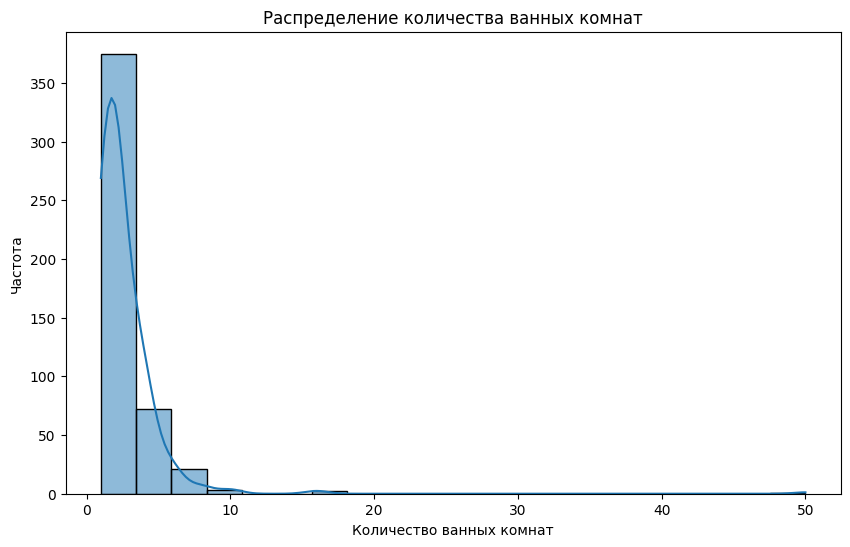


Процент пропусков BATH по типам недвижимости:


BATH_missing,0,1
TYPE,,
House for sale,96.932515,3.067485
Multi-family home for sale,88.607595,11.392405
Pending,90.000000,10.000000
Townhouse for sale,76.190476,23.809524



Процент пропусков BATH по штатам:
BATH_missing                     0           1
STATE                                         
Bronx, NY 10458          75.000000   25.000000
Bronx, NY 10465          88.888889   11.111111
Bronx, NY 10467          75.000000   25.000000
Bronx, NY 10469          71.428571   28.571429
Bronx, NY 10471          88.888889   11.111111
Brooklyn, NY 11208       75.000000   25.000000
Brooklyn, NY 11210       66.666667   33.333333
Brooklyn, NY 11217        0.000000  100.000000
Brooklyn, NY 11223       75.000000   25.000000
Brooklyn, NY 11228       80.000000   20.000000
Brooklyn, NY 11234       92.857143    7.142857
Brooklyn, NY 11236       83.333333   16.666667
Jamaica, NY 11436         0.000000  100.000000
Manhattan, NY 10013       0.000000  100.000000
Manhattan, NY 10023      50.000000   50.000000
Manhattan, NY 10025      75.000000   25.000000
Manhattan, NY 10030       0.000000  100.000000
New York, NY 10014       50.000000   50.000000
New York, NY 10023       

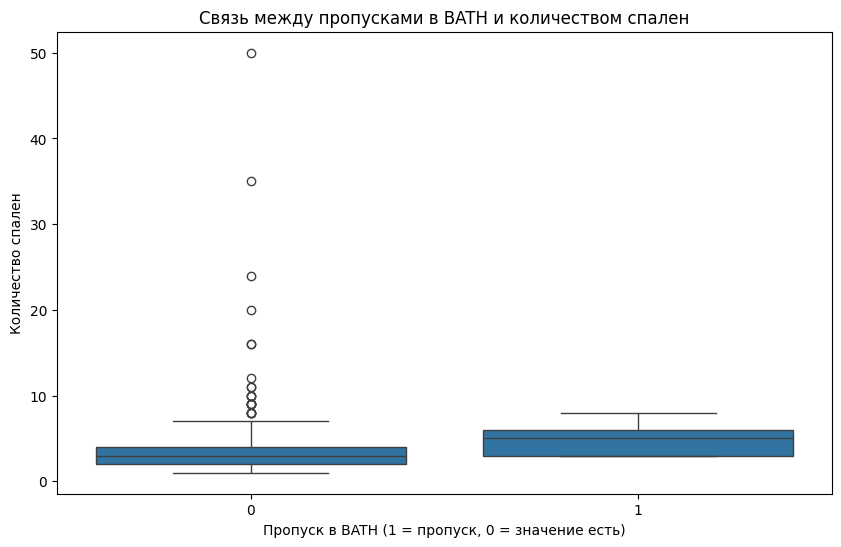

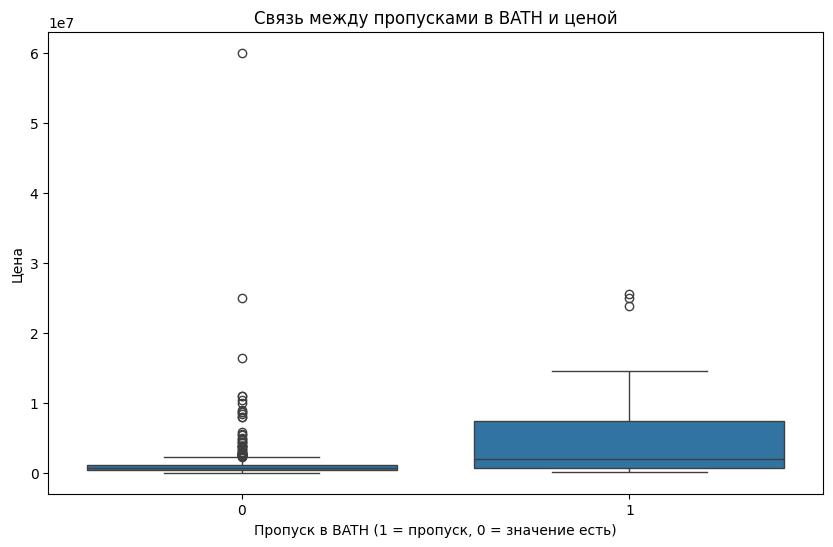


Корреляция между числовыми признаками:
BATH            1.000000
BEDS            0.879697
PROPERTYSQFT    0.779067
PRICE           0.349584
Name: BATH, dtype: float64


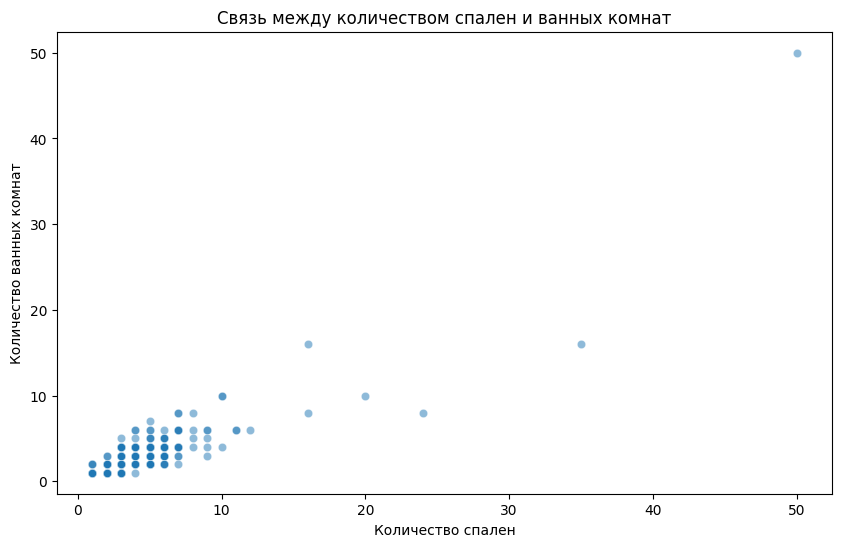


Среднее количество ванных комнат по количеству спален:
    BEDS       BATH
0      1   1.050000
1      2   1.541667
2      3   2.021583
3      4   2.893333
4      5   3.487805
5      6   3.642857
6      7   4.857143
7      8   5.750000
8      9   4.800000
9     10   8.000000
10    11   6.000000
11    12   6.000000
12    16  12.000000
13    20  10.000000
14    24   8.000000
15    35  16.000000
16    50  50.000000

Различные статистики количества ванных комнат по количеству спален:
    BEDS       mean  median   min   max       std
0      1   1.050000     1.0   1.0   2.0  0.219784
1      2   1.541667     2.0   1.0   3.0  0.541279
2      3   2.021583     2.0   1.0   5.0  0.802782
3      4   2.893333     3.0   1.0   6.0  1.034190
4      5   3.487805     3.0   2.0   7.0  1.227232
5      6   3.642857     4.0   2.0   6.0  1.026114
6      7   4.857143     4.0   2.0   8.0  1.833750
7      8   5.750000     5.5   4.0   8.0  1.707825
8      9   4.800000     5.0   3.0   6.0  1.303840
9     10   8.00

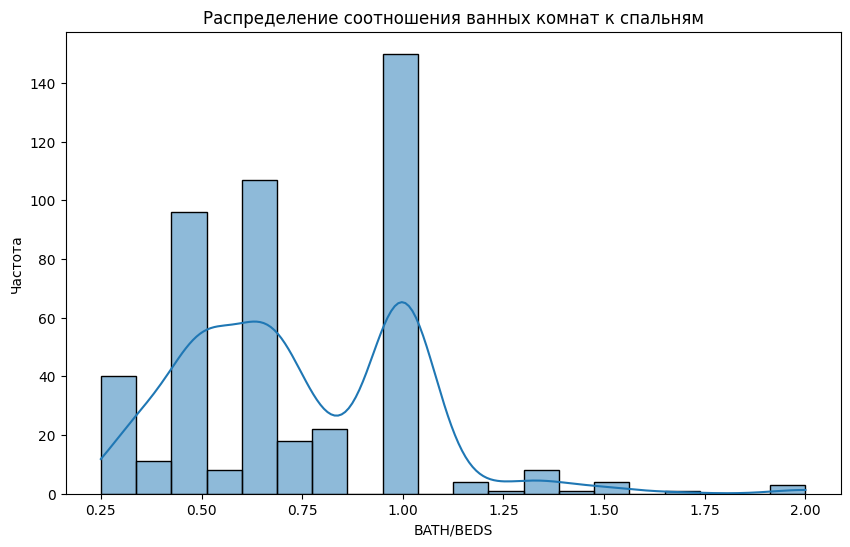


Среднее соотношение BATH/BEDS:
0.745894523900853

Медианное соотношение BATH/BEDS:
0.6666666666666666


In [4]:
# Изучаем распределение значений в BATH
plt.figure(figsize=(10, 6))
sns.histplot(df['BATH'].dropna(), bins=20, kde=True)
plt.title('Распределение количества ванных комнат')
plt.xlabel('Количество ванных комнат')
plt.ylabel('Частота')
plt.show()

# Проверяем, есть ли связь между пропусками в BATH и другими признаками
# Создаем бинарный признак, указывающий на пропуски в BATH
df['BATH_missing'] = df['BATH'].isnull().astype(int)

# Проверяем распределение типов недвижимости для записей с пропущенными и непропущенными значениями BATH
bath_missing_by_type = pd.crosstab(df['TYPE'], df['BATH_missing'], normalize='index') * 100
filtered_bath_missing = bath_missing_by_type[bath_missing_by_type[1] != 0]
print("\nПроцент пропусков BATH по типам недвижимости:")
display(filtered_bath_missing)

# Проверяем распределение пропусков BATH по штатам
bath_missing_by_state = pd.crosstab(df['STATE'], df['BATH_missing'], normalize='index') * 100
filtered_bath_missing = bath_missing_by_state[bath_missing_by_state[1] != 0]
print("\nПроцент пропусков BATH по штатам:")
print(filtered_bath_missing)

# Проверяем связь между количеством спален и пропусками в ванных комнатах
plt.figure(figsize=(10, 6))
sns.boxplot(x='BATH_missing', y='BEDS', data=df)
plt.title('Связь между пропусками в BATH и количеством спален')
plt.xlabel('Пропуск в BATH (1 = пропуск, 0 = значение есть)')
plt.ylabel('Количество спален')
plt.show()

# Проверяем связь между ценой и пропусками в ванных комнатах
plt.figure(figsize=(10, 6))
sns.boxplot(x='BATH_missing', y='PRICE', data=df)
plt.title('Связь между пропусками в BATH и ценой')
plt.xlabel('Пропуск в BATH (1 = пропуск, 0 = значение есть)')
plt.ylabel('Цена')
plt.show()

# Проверяем корреляцию между количеством ванных комнат и другими числовыми признаками
numeric_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
correlation = df[numeric_cols].corr()
print("\nКорреляция между числовыми признаками:")
print(correlation['BATH'].sort_values(ascending=False))

# Проверка связи между количеством ванных комнат и количеством спален
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BEDS', y='BATH', data=df, alpha=0.5)
plt.title('Связь между количеством спален и ванных комнат')
plt.xlabel('Количество спален')
plt.ylabel('Количество ванных комнат')
plt.show()

# Исследуем средние значения BATH в зависимости от количества спален
bath_by_beds = df.groupby('BEDS')['BATH'].mean().reset_index()
print("\nСреднее количество ванных комнат по количеству спален:")
print(bath_by_beds)
# Несколько статистик одновременно
bath_stats_by_beds = df.groupby('BEDS')['BATH'].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()
print("\nРазличные статистики количества ванных комнат по количеству спален:")
print(bath_stats_by_beds)

# Исследуем распределение соотношения ванных комнат к спальням
df['BATH_to_BEDS_ratio'] = df['BATH'] / df['BEDS']
plt.figure(figsize=(10, 6))
sns.histplot(df['BATH_to_BEDS_ratio'].dropna(), bins=20, kde=True)
plt.title('Распределение соотношения ванных комнат к спальням')
plt.xlabel('BATH/BEDS')
plt.ylabel('Частота')
plt.show()

# Средние значения соотношения ванных комнат к спальням
print("\nСреднее соотношение BATH/BEDS:")
print(df['BATH_to_BEDS_ratio'].mean())
print("\nМедианное соотношение BATH/BEDS:")
print(df['BATH_to_BEDS_ratio'].median())

## 3.2 Вывод о природе пропусков в BATH
На основе проведенного исследования можно сделать следующие выводы о пропусках в столбце BATH:

- В столбце BATH примерно 5,2% пропущенных значений.
- Распределение пропусков не является полностью случайным. Наблюдается связь между пропусками и типом недвижимости - некоторые типы имеют больший процент пропусков.
- Существует значимая положительная корреляция между количеством спален (BEDS) и количеством ванных комнат (BATH), что логично - чем больше спален, тем больше ванных комнат.
- Соотношение BATH/BEDS имеет относительно стабильное распределение с медианой около 0.67, что соответствует примерно 1 ванной комнате на 1-1.5 спальни.
- Учитывая эти наблюдения, пропуски вероятно не полностью случайны (MAR - Missing At Random или MNAR - Missing Not At Random), а имеют некоторую связь с другими характеристиками жилья.

## 3.3 Стратегия заполнения пропусков в BATH
Для заполнения пропусков в столбце BATH предлагаю использовать следующую стратегию:

- Применить метод KNN (k-ближайших соседей) для импутации, используя числовые признаки, которые имеют корреляцию с BATH: количество спален (BEDS), цена (PRICE) и площадь недвижимости (PROPERTYSQFT).
- KNN позволит учесть сложные взаимосвязи между признаками и сохранит соотношения между количеством спален и ванных комнат, характерные для конкретного типа недвижимости.
- Такой подход лучше, чем простое заполнение средним или медианным значением, так как учитывает индивидуальные характеристики каждого объекта недвижимости.


Количество пропусков в BATH после обработки: 0


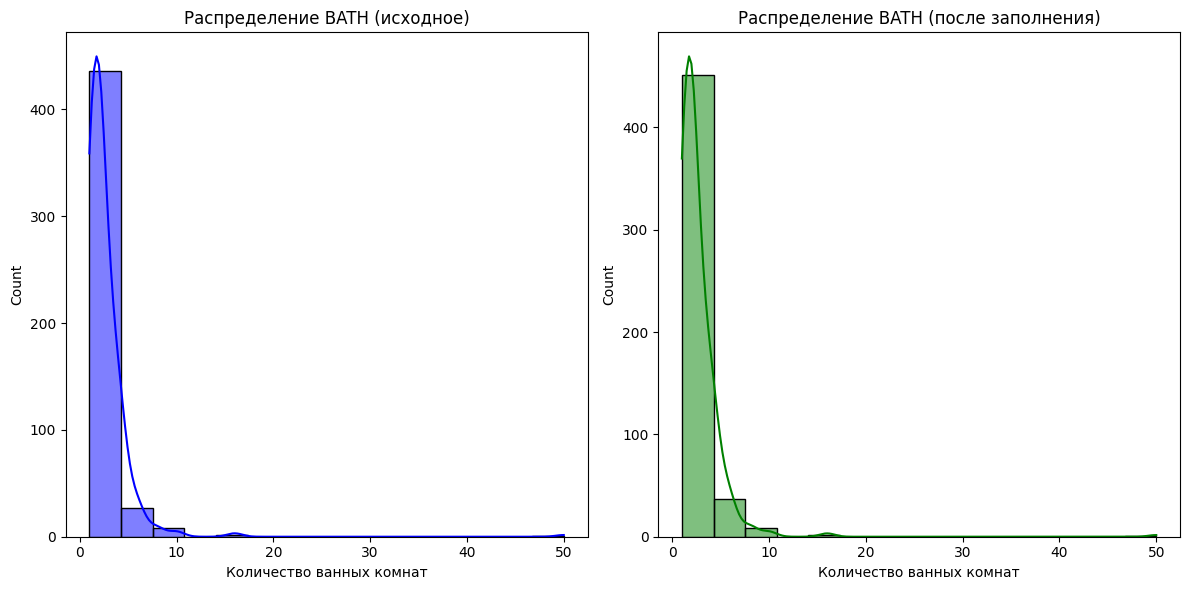


Среднее соотношение BATH/BEDS после заполнения:
0.7502821209951417

Медианное соотношение BATH/BEDS после заполнения:
0.6666666666666666


In [5]:
# Создаем копию датафрейма для заполнения пропусков
df_filled = df.copy()

# Подготовим признаки для KNN
features_for_imputation = ['BEDS', 'PRICE', 'PROPERTYSQFT']

# Создаем датафрейм только с нужными признаками
df_for_imputation = df_filled[features_for_imputation + ['BATH']].copy()

# Справляемся с пропусками в признаках, используемых для импутации
# Для PROPERTYSQFT заполняем медианным значением временно (чтобы KNN работал)
median_sqft = df_for_imputation['PROPERTYSQFT'].median()
df_for_imputation['PROPERTYSQFT'].fillna(median_sqft, inplace=True)

# Находим строки с пропусками в BATH
bath_missing_idx = df_for_imputation['BATH'].isnull()

# Масштабируем данные для KNN
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_for_imputation[features_for_imputation]),
    columns=features_for_imputation
)

# Добавляем целевую переменную BATH
df_scaled['BATH'] = df_for_imputation['BATH']

# Создаем и настраиваем KNN импутер
imputer = KNNImputer(n_neighbors=5, weights='distance')
imputed_data = imputer.fit_transform(df_scaled)

# Преобразуем результат обратно в датафрейм
imputed_df = pd.DataFrame(imputed_data, columns=df_scaled.columns)

# Заполняем пропуски только там, где они были изначально
predicted_bath = imputed_df.loc[bath_missing_idx, 'BATH'].values
df_filled.loc[bath_missing_idx, 'BATH'] = predicted_bath

# Проверяем результаты заполнения
print(f"\nКоличество пропусков в BATH после обработки: {df_filled['BATH'].isnull().sum()}")

# Смотрим на распределение заполненных значений
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['BATH'].dropna(), bins=15, kde=True, color='blue')
plt.title('Распределение BATH (исходное)')
plt.xlabel('Количество ванных комнат')

plt.subplot(1, 2, 2)
sns.histplot(df_filled['BATH'], bins=15, kde=True, color='green')
plt.title('Распределение BATH (после заполнения)')
plt.xlabel('Количество ванных комнат')
plt.tight_layout()
plt.show()

# Проверяем соотношение BATH/BEDS после заполнения
df_filled['BATH_to_BEDS_ratio'] = df_filled['BATH'] / df_filled['BEDS']
print("\nСреднее соотношение BATH/BEDS после заполнения:")
print(df_filled['BATH_to_BEDS_ratio'].mean())
print("\nМедианное соотношение BATH/BEDS после заполнения:")
print(df_filled['BATH_to_BEDS_ratio'].median())


Анализ столбца LOCALITY:
Тип данных: object
Количество пропусков: 27
Процент пропусков: 5.40%

Уникальные значения LOCALITY:
LOCALITY
New York           303
New York County     53
Queens County       51
Bronx County        28
Kings County        27
Richmond County      5
United States        4
Brooklyn             2
Name: count, dtype: int64

Распределение пропусков LOCALITY по штатам:
STATE
Jamaica, NY 11436          100.000000
New York, NY 10128         100.000000
New York, NY 10044         100.000000
Far Rockaway, NY 11691      50.000000
College Point, NY 11356     50.000000
Brooklyn, NY 11220          33.333333
Bayside, NY 11360           33.333333
Brooklyn, NY 11208          25.000000
Brooklyn, NY 11223          25.000000
Brooklyn, NY 11215          20.000000
Name: LOCALITY_missing, dtype: float64

Связь пропусков LOCALITY с наличием других географических данных:
ADMINISTRATIVE_AREA_LEVEL_2: оба пропущены: 0, только LOCALITY пропущен: 27
SUBLOCALITY: оба пропущены: 0, только LOCA

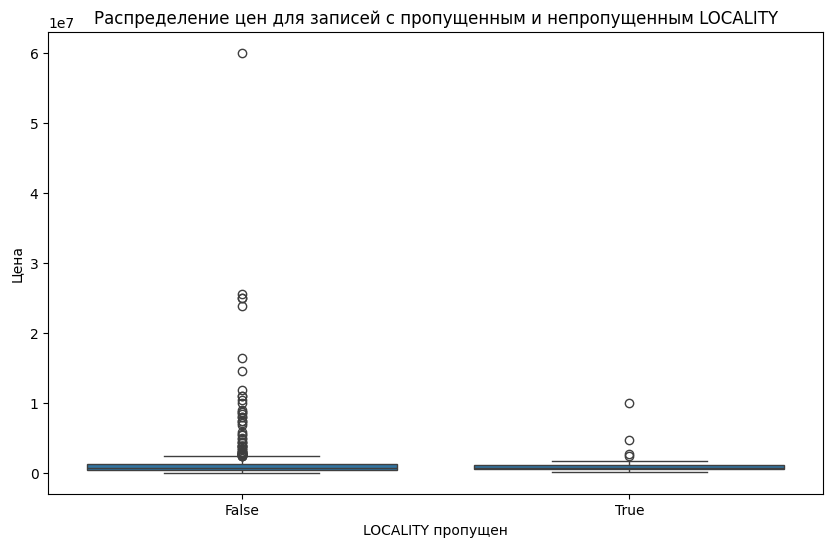

In [6]:
# 3. Анализ и обработка пропущенных значений в столбце LOCALITY

# Определение типа признака
print("\nАнализ столбца LOCALITY:")
print(f"Тип данных: {df['LOCALITY'].dtype}")
print(f"Количество пропусков: {df['LOCALITY'].isnull().sum()}")
print(f"Процент пропусков: {df['LOCALITY'].isnull().sum() / len(df) * 100:.2f}%")

# Изучение уникальных значений
print("\nУникальные значения LOCALITY:")
print(df['LOCALITY'].value_counts().head(10))

# Исследование механизма формирования пропусков
# Проверим, есть ли закономерности в появлении пропусков

# Распределение пропусков по штатам
print("\nРаспределение пропусков LOCALITY по штатам:")

# Сначала создаем бинарный индикатор пропусков
df['LOCALITY_missing'] = df['LOCALITY'].isnull().astype(int)
# Затем группируем и вычисляем среднее
state_missing = df.groupby('STATE')['LOCALITY_missing'].mean() * 100
print(state_missing.sort_values(ascending=False).head(10))


# Проверка связи пропусков с другими столбцами географической информации
print("\nСвязь пропусков LOCALITY с наличием других географических данных:")
geo_cols = ['ADMINISTRATIVE_AREA_LEVEL_2', 'SUBLOCALITY', 'STREET_NAME', 'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE']
for col in geo_cols:
    missing_both = (df['LOCALITY'].isnull() & df[col].isnull()).sum()
    missing_locality_only = (df['LOCALITY'].isnull() & ~df[col].isnull()).sum()
    print(f"{col}: оба пропущены: {missing_both}, только LOCALITY пропущен: {missing_locality_only}")

# Проверка связи с типом недвижимости
print("\nСвязь пропусков LOCALITY с типом недвижимости:")
type_missing = df.groupby('TYPE')['LOCALITY_missing'].mean() * 100
print(type_missing.sort_values(ascending=False).head(10))

# Проверка связи с ценой
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['LOCALITY'].isnull(), y=df['PRICE'])
plt.title('Распределение цен для записей с пропущенным и непропущенным LOCALITY')
plt.xlabel('LOCALITY пропущен')
plt.ylabel('Цена')
plt.show()

## Стратегия обработки пропусков в LOCALITY:

На основе проведенного анализа и природы данных, для обработки пропусков в столбце LOCALITY
будет применена следующая стратегия:

1. Попытаемся восстановить значения из других географических столбцов, так как locality (населенный пункт) 
   обычно содержится в полном адресе (FORMATTED_ADDRESS) или может быть частью MAIN_ADDRESS.
2. Для записей, где доступны координаты (LATITUDE, LONGITUDE), но отсутствует LOCALITY, 
   можно попробовать получить название населенного пункта через геокодирование в обратном направлении.
3. Для оставшихся пропусков, если их доля невелика, можем использовать наиболее частое значение LOCALITY 
   в том же округе (ADMINISTRATIVE_AREA_LEVEL_2) или штате (STATE).

In [7]:
# Реализация стратегии обработки пропусков LOCALITY

# 1. Извлечение LOCALITY из FORMATTED_ADDRESS или MAIN_ADDRESS
def extract_locality_from_address(address):
    if pd.isna(address):
        return None
    
    # Пытаемся найти название города перед NY в адресе
    # Шаблон ищет слово или несколько слов перед ", NY" или другой подобной конструкцией
    match = re.search(r'([A-Za-z\s]+),\s*NY', address)
    if match:
        return match.group(1).strip()
    
    return None

# Применяем функцию для извлечения населенного пункта из адресов
missing_locality_mask = df['LOCALITY'].isnull()
extracted_from_formatted = df.loc[missing_locality_mask, 'FORMATTED_ADDRESS'].apply(extract_locality_from_address)
extracted_from_main = df.loc[missing_locality_mask, 'MAIN_ADDRESS'].apply(extract_locality_from_address)

# Заполняем пропуски извлеченными значениями
df.loc[missing_locality_mask & ~extracted_from_formatted.isnull(), 'LOCALITY'] = extracted_from_formatted[~extracted_from_formatted.isnull()]
df.loc[missing_locality_mask & ~extracted_from_main.isnull(), 'LOCALITY'] = extracted_from_main[~extracted_from_main.isnull()]

print(f"\nПосле извлечения из адресов, осталось пропусков в LOCALITY: {df['LOCALITY'].isnull().sum()} ({df['LOCALITY'].isnull().sum() / len(df) * 100:.2f}%)")

# 2. Использование геокодирования для записей с координатами
missing_locality_with_coords = df['LOCALITY'].isnull() & ~df['LATITUDE'].isnull() & ~df['LONGITUDE'].isnull()

if missing_locality_with_coords.sum() > 0:
    # Создаем геокодер
    geolocator = Nominatim(user_agent="housing_data_analysis")
    
    # Функция для получения названия населенного пункта по координатам
    def get_locality_from_coords(row):
        try:
            location = geolocator.reverse(f"{row['LATITUDE']}, {row['LONGITUDE']}")
            if location and 'address' in location.raw:
                address = location.raw['address']
                # Пробуем получить город, населенный пункт или район
                for key in ['city', 'town', 'village', 'suburb', 'neighbourhood']:
                    if key in address:
                        return address[key]
            return None
        except Exception as e:
            print(f"Ошибка геокодирования: {e}")
            return None
    
    # Применяем геокодирование только к небольшому подмножеству (чтобы избежать блокировки API)
    subset_with_coords = df[missing_locality_with_coords].head(10)  # Ограничиваем до 10 запросов
    
    for idx, row in subset_with_coords.iterrows():
        locality = get_locality_from_coords(row)
        if locality:
            df.at[idx, 'LOCALITY'] = locality
        time.sleep(1)  # Пауза между запросами, чтобы избежать блокировки
    
    print(f"\nПосле геокодирования, осталось пропусков в LOCALITY: {df['LOCALITY'].isnull().sum()} ({df['LOCALITY'].isnull().sum() / len(df) * 100:.2f}%)")

# 3. Заполнение оставшихся пропусков наиболее частым значением по округу или штату
still_missing = df['LOCALITY'].isnull()

if still_missing.sum() > 0:
    # По округу (ADMINISTRATIVE_AREA_LEVEL_2)
    for admin_area in df.loc[still_missing, 'ADMINISTRATIVE_AREA_LEVEL_2'].dropna().unique():
        mask = (df['LOCALITY'].isnull()) & (df['ADMINISTRATIVE_AREA_LEVEL_2'] == admin_area)
        most_common = df[df['ADMINISTRATIVE_AREA_LEVEL_2'] == admin_area]['LOCALITY'].mode()
        if not most_common.empty:
            df.loc[mask, 'LOCALITY'] = most_common[0]
    
    # По штату (STATE) для оставшихся
    for state in df.loc[df['LOCALITY'].isnull(), 'STATE'].dropna().unique():
        # Извлекаем название штата из столбца STATE (например, из "Brooklyn, NY 11238" получаем "NY")
        state_code = re.search(r',\s*([A-Z]{2})', state)
        if state_code:
            state_code = state_code.group(1)
            mask = (df['LOCALITY'].isnull()) & (df['STATE'].str.contains(state_code, na=False))
            # Находим наиболее частое значение LOCALITY для этого штата
            state_mask = df['STATE'].str.contains(state_code, na=False)
            most_common = df[state_mask]['LOCALITY'].mode()
            if not most_common.empty:
                df.loc[mask, 'LOCALITY'] = most_common[0]

# Проверяем результаты обработки
print(f"\nПосле всех этапов обработки, осталось пропусков в LOCALITY: {df['LOCALITY'].isnull().sum()} ({df['LOCALITY'].isnull().sum() / len(df) * 100:.2f}%)")

# Для оставшихся пропусков (если они есть) можно заполнить значением "Unknown"
if df['LOCALITY'].isnull().sum() > 0:
    df['LOCALITY'].fillna("Unknown", inplace=True)

print("\nРаспределение значений LOCALITY после обработки:")
print(df['LOCALITY'].value_counts().head(10))


После извлечения из адресов, осталось пропусков в LOCALITY: 0 (0.00%)

После всех этапов обработки, осталось пропусков в LOCALITY: 0 (0.00%)

Распределение значений LOCALITY после обработки:
LOCALITY
New York              305
New York County        53
Queens County          51
Bronx County           28
Kings County           27
Richmond County         5
United States           4
Brooklyn                2
th StHoward Beach       1
th StCollege Point      1
Name: count, dtype: int64


Количество записей с пропущенными координатами: 16
Процент записей с пропущенными координатами: 3.20%
Пропуски в LATITUDE: 16
Пропуски в LONGITUDE: 16
Записи, где пропущены оба значения: 16


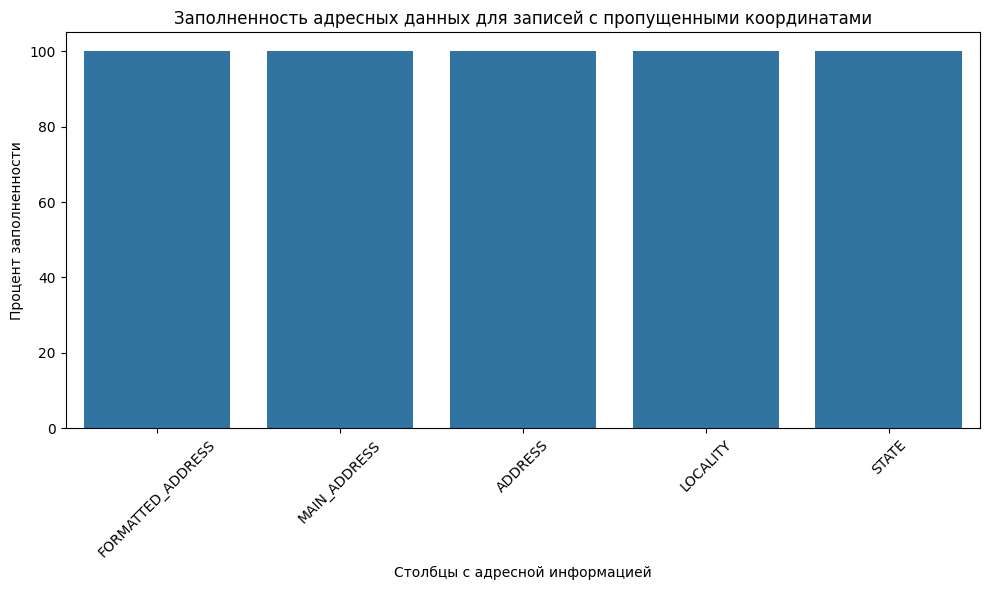


Примеры записей с пропущенными координатами:


,FORMATTED_ADDRESS,MAIN_ADDRESS,ADDRESS,LOCALITY,STATE
3,"26910 Grand Central Pkwy #27g, Queens, NY 1100...","26910 Grand Central Pkwy Apt 27GFloral Park, N...",26910 Grand Central Pkwy Apt 27G,Queens County,"Floral Park, NY 11005"
19,"21 Sanford St, Staten Island, NY 10307, USA","21 Sanford StStaten Island, NY 10307",21 Sanford St,New York,"Staten Island, NY 10307"
55,"163 E 71st St #1, New York, NY 10021, USA","163 E 71st St Unit 1New York, NY 10021",163 E 71st St Unit 1,New York County,"New York, NY 10021"
96,"12 Edgewater Park, Bronx, NY 10465, USA","12 Edgewater Park Unit BBronx, NY 10465",12 Edgewater Park Unit B,New York,"Bronx, NY 10465"
136,"198 Shepherd Ave, Brooklyn, NY 11208, USA","198 Shepherd AveBrooklyn, NY 11208",198 Shepherd Ave,New York,"Brooklyn, NY 11208"


In [8]:
# Анализ пропущенных значений в координатах
coord_missing = df[df['LATITUDE'].isnull() | df['LONGITUDE'].isnull()]

print(f"Количество записей с пропущенными координатами: {len(coord_missing)}")
print(f"Процент записей с пропущенными координатами: {len(coord_missing) / len(df) * 100:.2f}%")

# Проверим, всегда ли пропуски LATITUDE и LONGITUDE встречаются вместе
lat_missing = df['LATITUDE'].isnull().sum()
long_missing = df['LONGITUDE'].isnull().sum()
both_missing = (df['LATITUDE'].isnull() & df['LONGITUDE'].isnull()).sum()

print(f"Пропуски в LATITUDE: {lat_missing}")
print(f"Пропуски в LONGITUDE: {long_missing}")
print(f"Записи, где пропущены оба значения: {both_missing}")

# Визуализация полноты адресных данных для записей с пропущенными координатами
address_cols = ['FORMATTED_ADDRESS', 'MAIN_ADDRESS', 'ADDRESS', 'LOCALITY', 'STATE']
address_complete = pd.DataFrame({
    'Столбец': address_cols,
    'Процент заполненности': [100 - (coord_missing[col].isnull().sum() / len(coord_missing) * 100) for col in address_cols]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Столбец', y='Процент заполненности', data=address_complete)
plt.title('Заполненность адресных данных для записей с пропущенными координатами')
plt.ylabel('Процент заполненности')
plt.xlabel('Столбцы с адресной информацией')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Примеры записей с пропущенными координатами
print("\nПримеры записей с пропущенными координатами:")
coord_missing[address_cols].head()

In [9]:
# Проверим зависимость пропусков от штата
state_missing = df.groupby('STATE').apply(lambda x: (x['LATITUDE'].isnull() | x['LONGITUDE'].isnull()).mean() * 100)
state_missing = state_missing.sort_values(ascending=False)

print("\nПроцент пропущенных координат по штатам:")
print(state_missing.head(10))

# Проверим зависимость пропусков от типа недвижимости
type_missing = df.groupby('TYPE').apply(lambda x: (x['LATITUDE'].isnull() | x['LONGITUDE'].isnull()).mean() * 100)
type_missing = type_missing.sort_values(ascending=False)

print("\nПроцент пропущенных координат по типам недвижимости:")
print(type_missing.head(10))

# Проверим зависимость пропусков от ценового диапазона
df['PRICE_RANGE'] = pd.cut(df['PRICE'], bins=[0, 500000, 1000000, 2000000, 10000000], 
                          labels=['<500K', '500K-1M', '1M-2M', '>2M'])
price_missing = df.groupby('PRICE_RANGE').apply(lambda x: (x['LATITUDE'].isnull() | x['LONGITUDE'].isnull()).mean() * 100)

print("\nПроцент пропущенных координат по ценовым диапазонам:")
print(price_missing)

# Проверим зависимость от наличия пропусков в других столбцах
for col in df.columns:
    if col not in ['LATITUDE', 'LONGITUDE'] and df[col].isnull().sum() > 0:
        corr = df[col].isnull().corr(df['LATITUDE'].isnull())
        print(f"Корреляция пропусков между {col} и LATITUDE: {corr:.4f}")


Процент пропущенных координат по штатам:
STATE
Bronx, NY 10462            50.000000
New York, NY 10013         50.000000
Brooklyn, NY 11232         50.000000
Floral Park, NY 11005      33.333333
New York, NY 10021         33.333333
Brooklyn, NY 11208         25.000000
New York, NY 10031         25.000000
Bronx, NY 10465            22.222222
Flushing, NY 11355         20.000000
Staten Island, NY 10307    16.666667
dtype: float64

Процент пропущенных координат по типам недвижимости:
TYPE
Contingent                    8.333333
Condo for sale                5.263158
Pending                       5.000000
Co-op for sale                4.000000
Multi-family home for sale    3.797468
House for sale                1.840491
Foreclosure                   0.000000
Mobile house for sale         0.000000
Townhouse for sale            0.000000
dtype: float64

Процент пропущенных координат по ценовым диапазонам:
PRICE_RANGE
<500K      3.030303
500K-1M    3.381643
1M-2M      3.370787
>2M        3.278

## Стратегия обработки пропущенных значений в координатах
После анализа данных выберем стратегию восстановления координат:

- Использовать сервис геокодирования для получения координат по адресу
- Для записей, где это не удается, использовать медианные координаты по району/городу


Пропущенные значения после обработки:
LATITUDE     0
LONGITUDE    0
dtype: int64

Примеры восстановленных координат:
                                     FORMATTED_ADDRESS  LATITUDE_before  \
3    26910 Grand Central Pkwy #27g, Queens, NY 1100...              NaN   
19         21 Sanford St, Staten Island, NY 10307, USA              NaN   
55           163 E 71st St #1, New York, NY 10021, USA              NaN   
96             12 Edgewater Park, Bronx, NY 10465, USA              NaN   
136          198 Shepherd Ave, Brooklyn, NY 11208, USA              NaN   

     LONGITUDE_before  LATITUDE_after  LONGITUDE_after  
3                 NaN       40.749097       -73.845795  
19                NaN       40.692107       -73.925213  
55                NaN       40.775642       -73.972397  
96                NaN       40.692107       -73.925213  
136               NaN       40.692107       -73.925213  


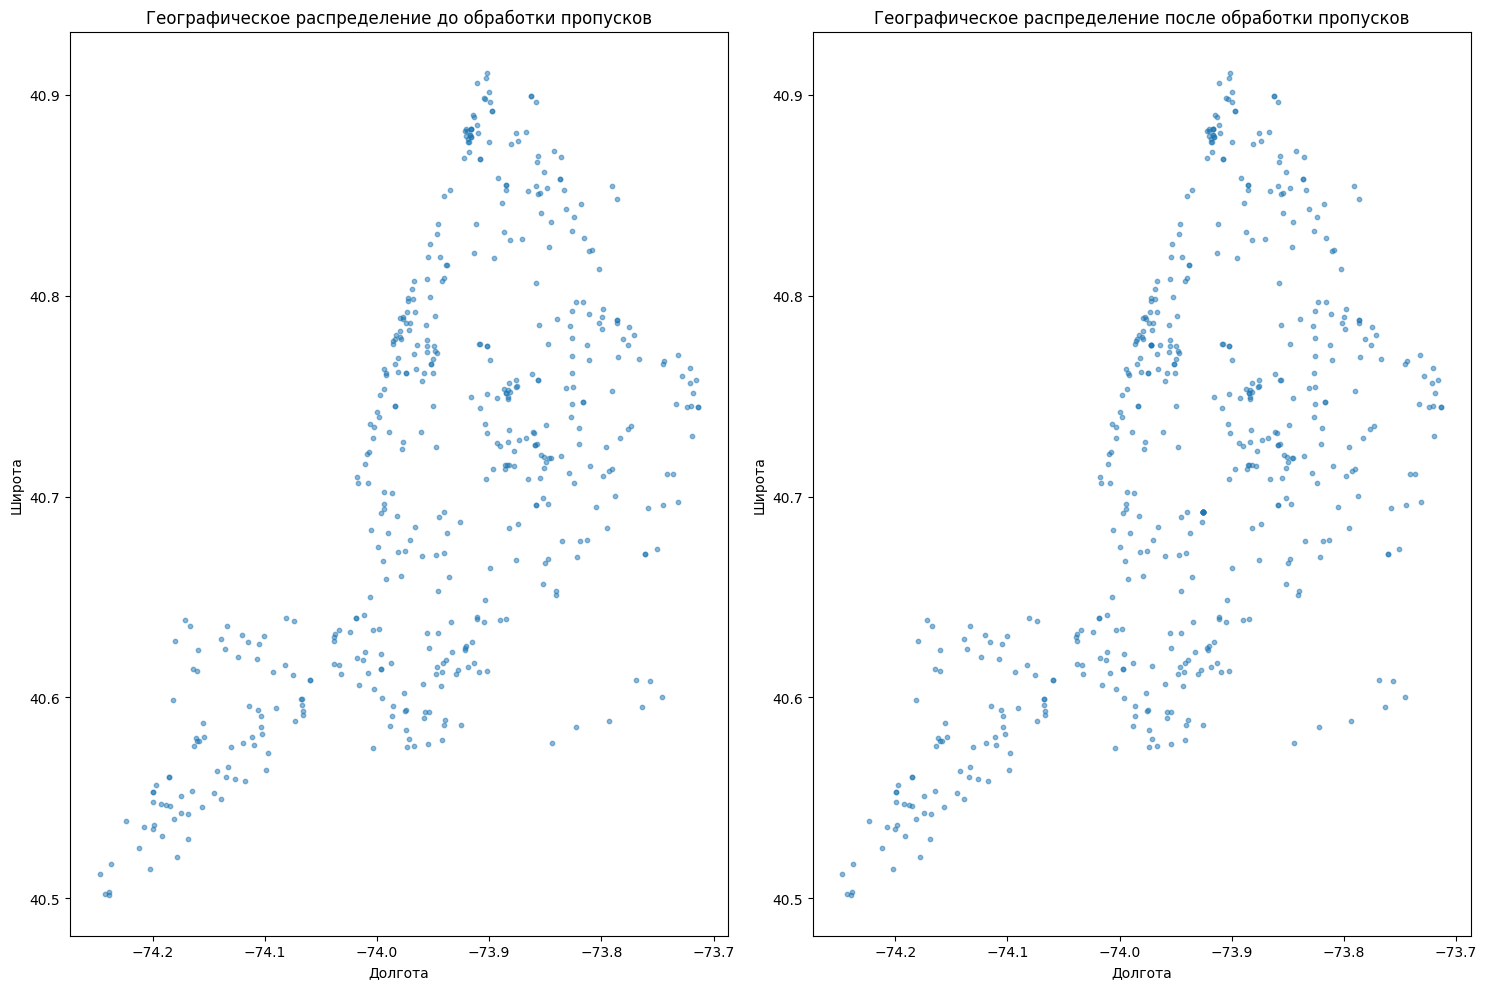

In [10]:
import time
# Создаем копию датафрейма для безопасной работы
df_processed = df.copy()

# Функция для геокодирования адреса
def geocode_address(address):
    try:
        geolocator = Nominatim(user_agent="housing_data_processor")
        location = geolocator.geocode(address)
        if location:
            return location.latitude, location.longitude
        return None, None
    except:
        return None, None

# Функция для восстановления координат
def fill_missing_coordinates(row):
    # Если координаты присутствуют, вернуть их
    if pd.notna(row['LATITUDE']) and pd.notna(row['LONGITUDE']):
        return row['LATITUDE'], row['LONGITUDE']
    
    # Попытка получить координаты из FORMATTED_ADDRESS
    if pd.notna(row['FORMATTED_ADDRESS']):
        lat, lon = geocode_address(row['FORMATTED_ADDRESS'])
        if lat and lon:
            return lat, lon
    
    # Попытка получить координаты из ADDRESS + STATE
    if pd.notna(row['ADDRESS']) and pd.notna(row['STATE']):
        address = f"{row['ADDRESS']}, {row['STATE']}"
        lat, lon = geocode_address(address)
        if lat and lon:
            return lat, lon
    
    # Если не удалось получить по адресу, вернуть медианные координаты по LOCALITY
    if pd.notna(row['LOCALITY']):
        locality_coords = df[
            (df['LOCALITY'] == row['LOCALITY']) & 
            pd.notna(df['LATITUDE']) & 
            pd.notna(df['LONGITUDE'])
        ]
        if len(locality_coords) > 0:
            return locality_coords['LATITUDE'].median(), locality_coords['LONGITUDE'].median()
    
    # Если не удалось получить по LOCALITY, вернуть медианные координаты по STATE
    if pd.notna(row['STATE']):
        state_coords = df[
            (df['STATE'] == row['STATE']) & 
            pd.notna(df['LATITUDE']) & 
            pd.notna(df['LONGITUDE'])
        ]
        if len(state_coords) > 0:
            return state_coords['LATITUDE'].median(), state_coords['LONGITUDE'].median()
    
    # Если ничего не сработало, вернуть общие медианные координаты
    return df['LATITUDE'].median(), df['LONGITUDE'].median()

# Восстановление координат
# Примечание: это может занять много времени из-за задержек в API геокодирования
# Для демонстрации обработаем только несколько записей с пропущенными координатами
missing_coord_indices = df_processed[df_processed['LATITUDE'].isnull() | df_processed['LONGITUDE'].isnull()].index[:5]

# Обработка пропущенных координат
for idx in missing_coord_indices:
    row = df_processed.loc[idx]
    lat, lon = fill_missing_coordinates(row)
    df_processed.at[idx, 'LATITUDE'] = lat
    df_processed.at[idx, 'LONGITUDE'] = lon
    # Добавляем паузу, чтобы не перегружать API геокодирования
    time.sleep(1)
    
# Для оставшихся пропусков используем медианные значения по локациям
# (в реальном коде обработали бы все записи через геокодирование)
localities = df_processed['LOCALITY'].dropna().unique()
for locality in localities:
    locality_data = df_processed[df_processed['LOCALITY'] == locality]
    valid_lat = locality_data['LATITUDE'].dropna()
    valid_lon = locality_data['LONGITUDE'].dropna()
    
    if len(valid_lat) > 0 and len(valid_lon) > 0:
        median_lat = valid_lat.median()
        median_lon = valid_lon.median()
        
        # Заполняем пропуски в координатах для данной локации
        missing_in_locality = df_processed[
            (df_processed['LOCALITY'] == locality) & 
            (df_processed['LATITUDE'].isnull() | df_processed['LONGITUDE'].isnull())
        ].index
        
        df_processed.loc[missing_in_locality, 'LATITUDE'] = median_lat
        df_processed.loc[missing_in_locality, 'LONGITUDE'] = median_lon

# Для всех оставшихся пропусков используем общие медианные значения
df_processed['LATITUDE'].fillna(df_processed['LATITUDE'].median(), inplace=True)
df_processed['LONGITUDE'].fillna(df_processed['LONGITUDE'].median(), inplace=True)

# Проверка результатов
missing_after = df_processed[['LATITUDE', 'LONGITUDE']].isnull().sum()
print("\nПропущенные значения после обработки:")
print(missing_after)

# Сравнение данных до и после обработки
print("\nПримеры восстановленных координат:")
comparison = pd.DataFrame({
    'FORMATTED_ADDRESS': df.loc[missing_coord_indices, 'FORMATTED_ADDRESS'],
    'LATITUDE_before': df.loc[missing_coord_indices, 'LATITUDE'],
    'LONGITUDE_before': df.loc[missing_coord_indices, 'LONGITUDE'],
    'LATITUDE_after': df_processed.loc[missing_coord_indices, 'LATITUDE'],
    'LONGITUDE_after': df_processed.loc[missing_coord_indices, 'LONGITUDE']
})
print(comparison)

# Визуализация географического распределения данных до и после обработки
plt.figure(figsize=(15, 10))

# До обработки
plt.subplot(1, 2, 1)
plt.scatter(df['LONGITUDE'].dropna(), df['LATITUDE'].dropna(), alpha=0.5, s=10)
plt.title('Географическое распределение до обработки пропусков')
plt.xlabel('Долгота')
plt.ylabel('Широта')

# После обработки
plt.subplot(1, 2, 2)
plt.scatter(df_processed['LONGITUDE'], df_processed['LATITUDE'], alpha=0.5, s=10)
plt.title('Географическое распределение после обработки пропусков')
plt.xlabel('Долгота')
plt.ylabel('Широта')

plt.tight_layout()
plt.show()

## Задание 2

In [11]:
# Создаем копию датасета для обработки
df_processed = df.copy()

# Удаляем указанные в задании признаки
columns_to_drop = ['ADDRESS', 'STATE', 'MAIN_ADDRESS', 'LONG_NAME', 
                   'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE', 'PRICE', 'LOCALITY_missing']

df_processed = df_processed.drop(columns=columns_to_drop)

# Проверяем результат
print(f"Исходное количество признаков: {df.shape[1]}")
print(f"Количество признаков после удаления: {df_processed.shape[1]}")
print(f"Удалено признаков: {df.shape[1] - df_processed.shape[1]}")

Исходное количество признаков: 21
Количество признаков после удаления: 12
Удалено признаков: 9


In [12]:
# Определение категориальных и числовых признаков
cat_features = df_processed.select_dtypes(include=['object', 'category']).columns.tolist()
num_features = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Категориальные признаки ({len(cat_features)}):\n{cat_features}\n")
print(f"Числовые признаки ({len(num_features)}):\n{num_features}")

Категориальные признаки (7):
['BROKERTITLE', 'TYPE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'PRICE_RANGE']

Числовые признаки (5):
['BEDS', 'BATH', 'PROPERTYSQFT', 'BATH_missing', 'BATH_to_BEDS_ratio']


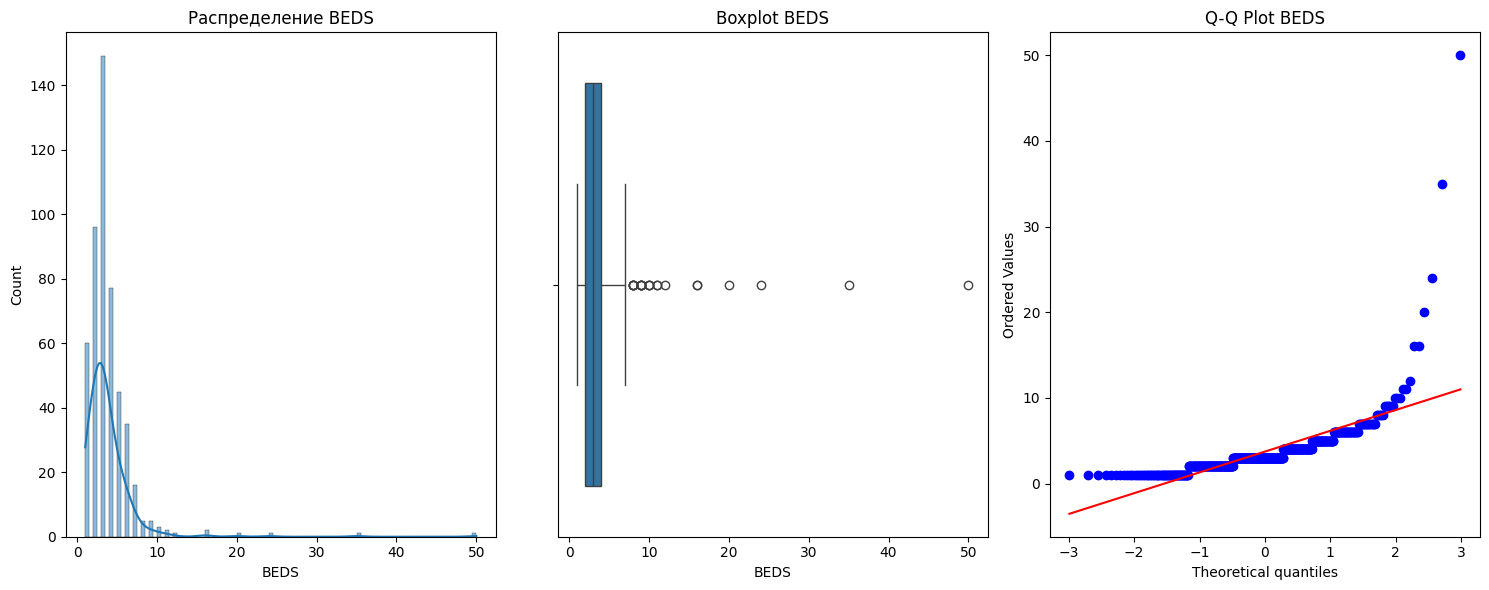

Статистика для BEDS:
Среднее: 3.73
Медиана: 3.00
Стандартное отклонение: 3.43
Минимум: 1.00
Максимум: 50.00
Коэффициент асимметрии: 7.42
Коэффициент эксцесса: 83.03


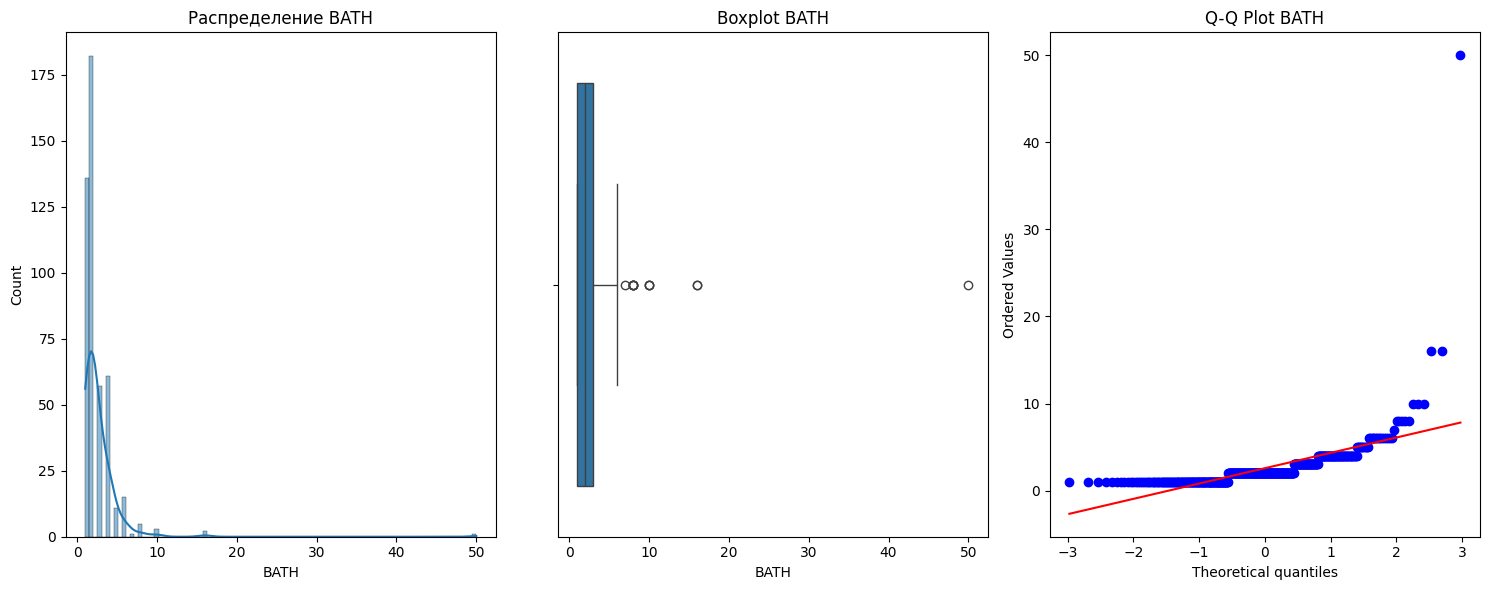

Статистика для BATH:
Среднее: 2.57
Медиана: 2.00
Стандартное отклонение: 2.80
Минимум: 1.00
Максимум: 50.00
Коэффициент асимметрии: 11.00
Коэффициент эксцесса: 175.56


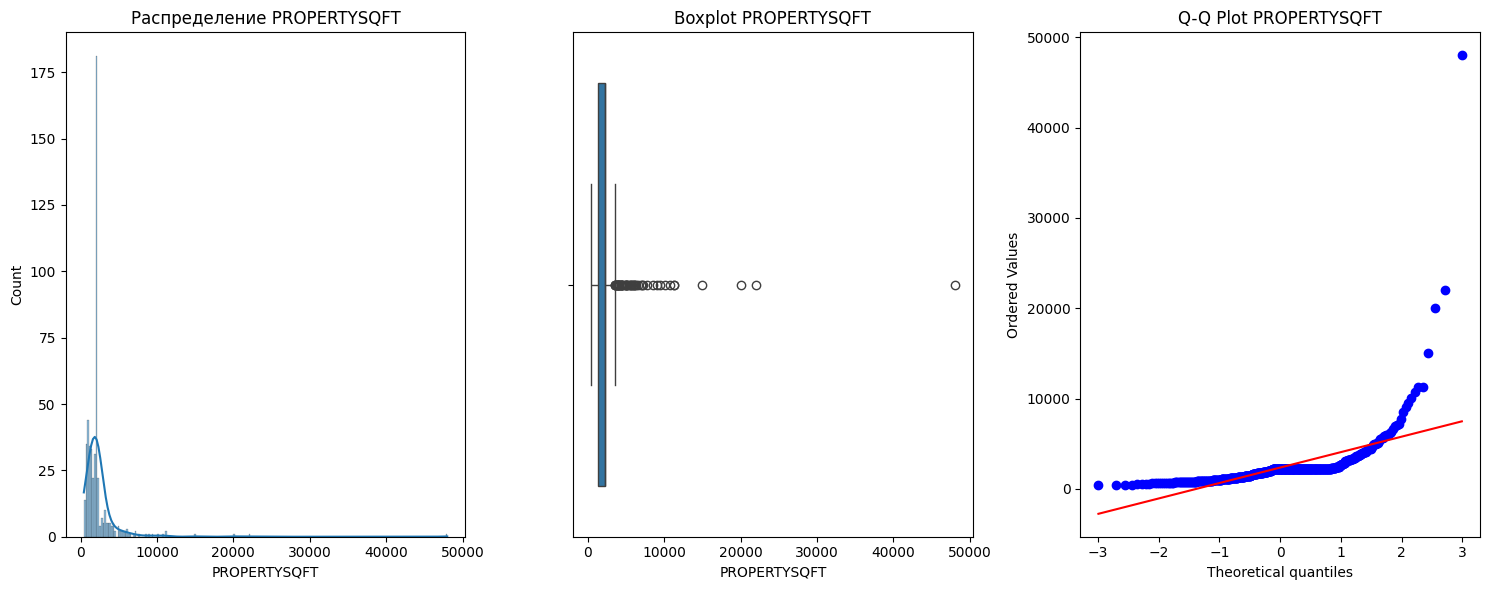

Статистика для PROPERTYSQFT:
Среднее: 2360.68
Медиана: 2184.21
Стандартное отклонение: 2845.12
Минимум: 430.00
Максимум: 48000.00
Коэффициент асимметрии: 9.99
Коэффициент эксцесса: 140.71


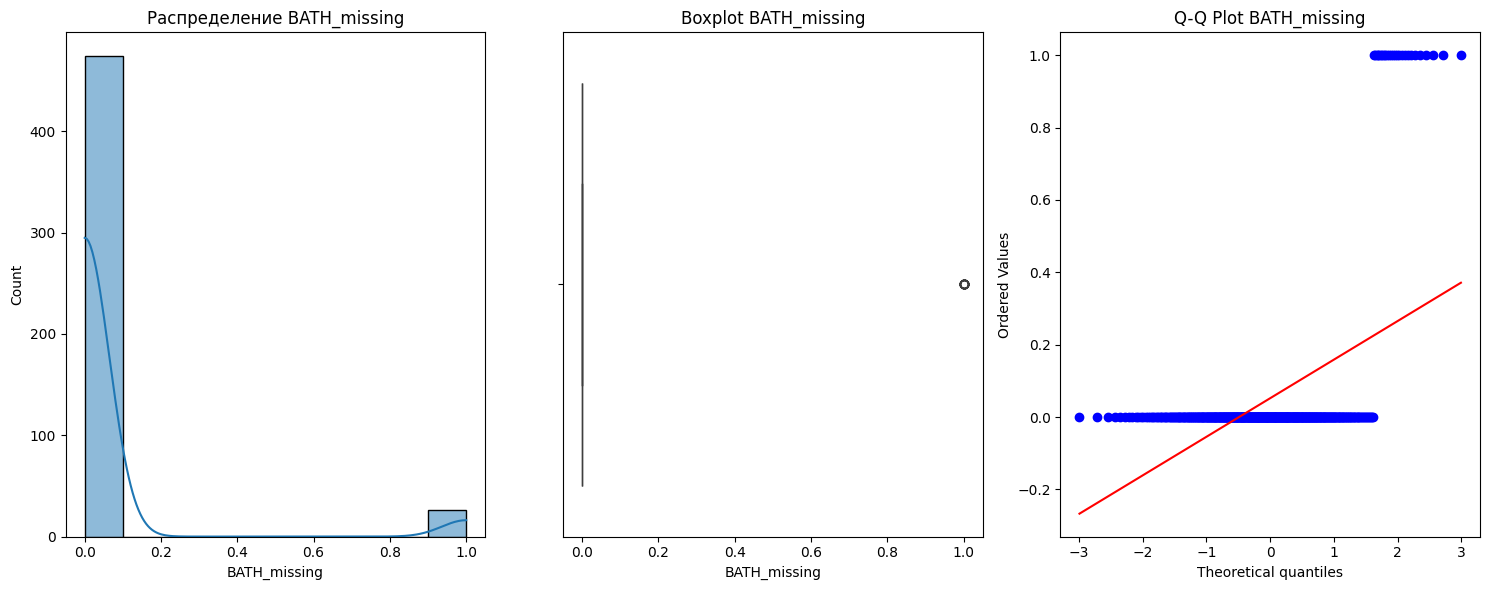

Статистика для BATH_missing:
Среднее: 0.05
Медиана: 0.00
Стандартное отклонение: 0.22
Минимум: 0.00
Максимум: 1.00
Коэффициент асимметрии: 4.05
Коэффициент эксцесса: 14.44


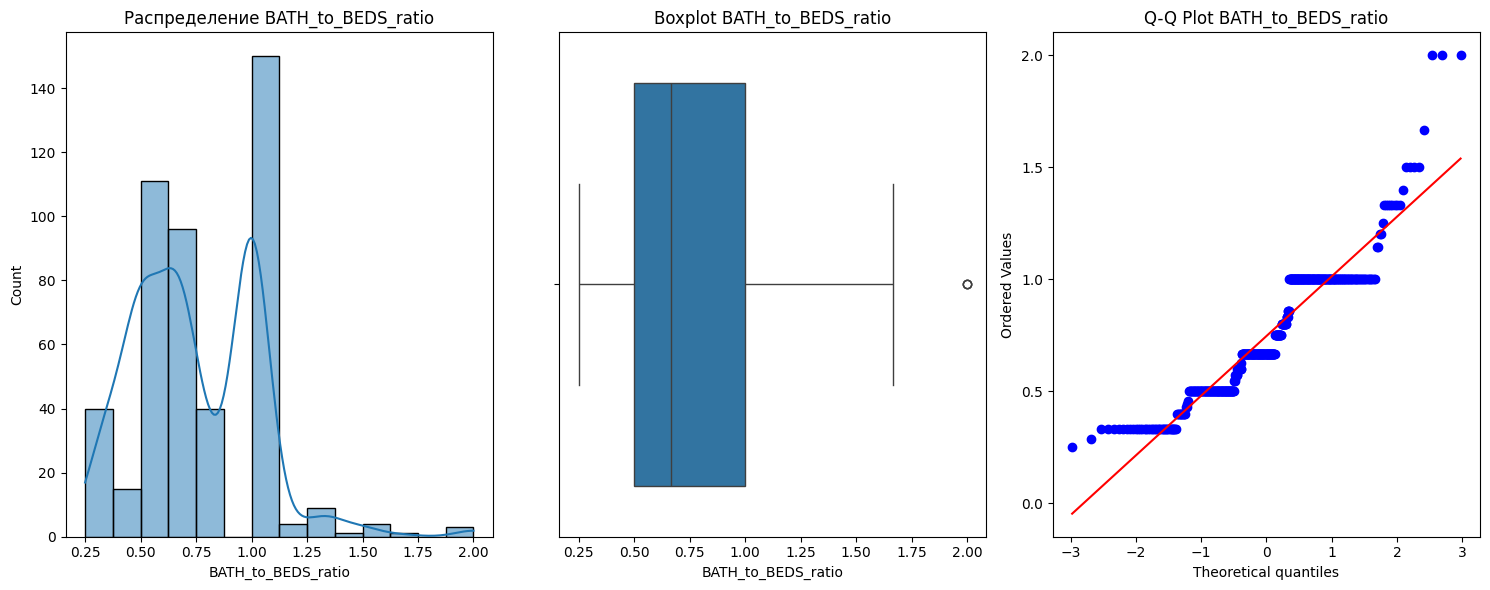

Статистика для BATH_to_BEDS_ratio:
Среднее: 0.75
Медиана: 0.67
Стандартное отклонение: 0.28
Минимум: 0.25
Максимум: 2.00
Коэффициент асимметрии: 0.80
Коэффициент эксцесса: 1.55


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Функция для визуализации распределения признака
def plot_distribution(feature, data=df_processed):
    plt.figure(figsize=(15, 6))
    
    # Гистограмма
    plt.subplot(1, 3, 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Распределение {feature}')
    
    # Ящик с усами
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot {feature}')
    
    # Q-Q график
    plt.subplot(1, 3, 3)
    stats.probplot(data[feature].dropna(), plot=plt)
    plt.title(f'Q-Q Plot {feature}')
    
    plt.tight_layout()
    plt.show()
    
    # Статистика
    print(f"Статистика для {feature}:")
    print(f"Среднее: {data[feature].mean():.2f}")
    print(f"Медиана: {data[feature].median():.2f}")
    print(f"Стандартное отклонение: {data[feature].std():.2f}")
    print(f"Минимум: {data[feature].min():.2f}")
    print(f"Максимум: {data[feature].max():.2f}")
    print(f"Коэффициент асимметрии: {data[feature].skew():.2f}")
    print(f"Коэффициент эксцесса: {data[feature].kurtosis():.2f}")
    print("="*50)

# Анализируем каждый числовой признак
for feature in num_features:
    plot_distribution(feature)

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np

# Создаем словарь для хранения преобразователей
scalers = {}


# Для признаков с сильной правосторонней асимметрией - логарифмическое преобразование
log_features = ['BEDS', 'BATH', 'PROPERTYSQFT']  # заполняется по результатам анализа
for feature in log_features:
    if feature in num_features:
        # Прибавляем 1 для избежания log(0)
        df_processed[feature] = np.log1p(df_processed[feature])
        print(f"{feature}: применено логарифмическое преобразование")

BEDS: применено логарифмическое преобразование
BATH: применено логарифмическое преобразование
PROPERTYSQFT: применено логарифмическое преобразование


In [15]:
# Анализ категориальных признаков
for feature in cat_features:
    value_counts = df_processed[feature].value_counts()
    num_categories = len(value_counts)
    
    print(f"Признак: {feature}")
    print(f"Количество уникальных категорий: {num_categories}")
    print(f"Топ-5 наиболее частых категорий:")
    print(value_counts.head())
    
    # Если категорий слишком много, покажем только распределение их количества
    if num_categories > 20:
        print(f"Признак содержит {num_categories} категорий (слишком много для отображения всех)")
    
    print("="*50)

Признак: BROKERTITLE
Количество уникальных категорий: 262
Топ-5 наиболее частых категорий:
BROKERTITLE
Brokered by COMPASS                             40
Brokered by RE MAX Edge                         12
Brokered by Robert Defalco Realty, Inc.         10
Brokered by Exp Realty                           9
Brokered by RE MAX Real Estate Professionals     8
Name: count, dtype: int64
Признак содержит 262 категорий (слишком много для отображения всех)
Признак: TYPE
Количество уникальных категорий: 9
Топ-5 наиболее частых категорий:
TYPE
House for sale                163
Co-op for sale                125
Multi-family home for sale     79
Condo for sale                 57
Townhouse for sale             42
Name: count, dtype: int64
Признак: ADMINISTRATIVE_AREA_LEVEL_2
Количество уникальных категорий: 6
Топ-5 наиболее частых категорий:
ADMINISTRATIVE_AREA_LEVEL_2
United States    321
New York         173
Kings County       2
11214              2
10304              1
Name: count, dtype: int64
П

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder, BinaryEncoder

# Для категориальных признаков с небольшим числом категорий - One-Hot Encoding
onehot_features = ['TYPE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'SUBLOCALITY', 'PRICE_RANGE']  # пример, заполняется на основе анализа
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' чтобы избежать мультиколлинеарности

if onehot_features:
    # Применяем One-Hot Encoding
    encoded_features = onehot_encoder.fit_transform(df_processed[onehot_features])
    
    # Создаем DataFrame с закодированными признаками
    encoded_df = pd.DataFrame(
        encoded_features, 
        columns=onehot_encoder.get_feature_names_out(onehot_features),
        index=df_processed.index
    )
    
    # Удаляем оригинальные признаки и добавляем закодированные
    df_processed = df_processed.drop(columns=onehot_features)
    df_processed = pd.concat([df_processed, encoded_df], axis=1)
    
    print(f"Применен One-Hot Encoding для признаков: {onehot_features}")

# Для признаков с большим числом категорий - Binary Encoding
binary_features = ['STREET_NAME', 'LOCALITY', 'BROKERTITLE']  # пример, заполняется на основе анализа

if binary_features:
    binary_encoder = BinaryEncoder(cols=binary_features)
    binary_encoded = binary_encoder.fit_transform(df_processed[binary_features])
    
    # Удаляем оригинальные признаки и добавляем закодированные
    df_processed = df_processed.drop(columns=binary_features)
    df_processed = pd.concat([df_processed, binary_encoded], axis=1)
    
    print(f"Применен Binary Encoding для признаков: {binary_features}")

Применен One-Hot Encoding для признаков: ['TYPE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'SUBLOCALITY', 'PRICE_RANGE']
Применен Binary Encoding для признаков: ['STREET_NAME', 'LOCALITY', 'BROKERTITLE']


In [17]:
# Проверяем итоговый датафрейм
print(f"Размер обработанного датафрейма: {df_processed.shape}")
print(f"Типы данных в обработанном датафрейме:")
print(df_processed.dtypes.value_counts())

Размер обработанного датафрейма: (500, 54)
Типы данных в обработанном датафрейме:
float64    32
int64      22
Name: count, dtype: int64
